In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

from performing import Audio, Performer

In [2]:
test_audio_file = 'scrapbook/unravel.flac'
test_audio = Audio.load(test_audio_file, offset=0.5, duration=3)
test_audio.audio[-10000:] *= np.linspace(1,0.01,10000)
test_audio.audio[:20000] *= np.linspace(0.01,0.8,20000)

In [4]:
test_audio.play()

In [23]:
filtered = savgol_filter(
  np.abs(test_audio.audio), window_length=501, polyorder=1, mode='interp'
)

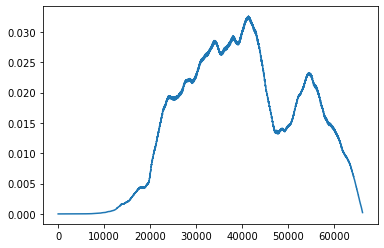

In [24]:
plt.plot(filtered)

In [25]:
from envelope import Envelope
from timbre import Timbre
T = Timbre(test_audio.audio, test_audio.sample_rate)
E = Envelope.from_audio(input_audio=test_audio)

In [27]:
p1 = Performer(
    [
        ['C2, C3, G#3, A3, A2'],
        ['G2, E2, G2, A#2, B3']
    ],
    durations=[0.5, 1, 0.5],
    timbre=T.timbre,
    envelope=E
)

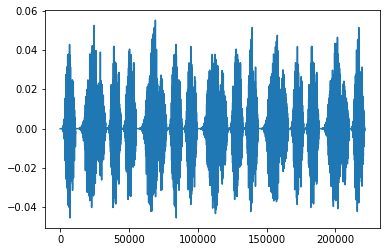

In [29]:
plt.plot(p1.audio)

In [30]:
p1.play()